In [147]:
import pandas as pd
sample = pd.read_excel('Stats_Height_Weight.xlsx')
sample.rename(columns={"Groesse [cm]": "height"}, inplace=True)
heights = sample[["height"]]
heights.head(5)

,height
0,185
1,181
2,182
3,165
4,173


# Schritt 1
Zusatzannahme: Die Verteilungen der einzelnen Messungen $X_1, X_2, ..., X_n$ sind normalverteilt mit unbekanntem Erwartungswert µ und  Varianz $σ^2$.

Wird ganz am Schluss noch überprüft.

# Schritt 2
$\mu_0 = 170cm$

$H_0: \mu \leq \mu_0$

$H_A: \mu > \mu_0$

In [148]:
mu0 = 170

# Schritt 3

Mit scipy wird die Teststatistik sowie der p-Wert gleichzeitig berechnet.

Die Teststatistik:

 $\displaystyle z = \frac{\overline{x} - \mu_0}{s/\sqrt{n}}$

In [149]:
import scipy.stats

test_statistic, p_wert = scipy.stats.ttest_1samp(heights, mu0, alternative="greater")
test_statistic

array([3.64777548])

# Schritt 4
Der zugehörige $p$-Wert ergab sich bereits.

$p$-Wert = $P(Z \geq z)= 1- P(Z\leq z)$.

In [150]:
p_wert

array([0.00070912])

# Schritt 5
Da kein Signifikanzniveau angegeben ist, nehmen wir $\alpha = 0.05$.

In [151]:
alpha = 0.05

# Schritt 6
Gemäss Formel:

$
[x_{\text{lower\_limit}}, x_{\text{upper\_limit}}] =
\left[ \bar{x} - z_{0.95} \cdot \frac{s}{\sqrt{n}},\ \infty \right)
$

In $95\%$ der Fällen wird ein Mittelwert gemessen,
der im unteren Interval liegt.



In [152]:
import statsmodels.stats.api as sms
sms.DescrStatsW(heights).tconfint_mean(alpha=0.05, alternative='larger')

(array([173.9119409]), inf)

# Schritt 7
Da $p$-Wert $< \alpha$ ist, wird die Nullhypothese $H_0$ verworfen.

In [153]:
if p_wert < alpha:
    print("Verwerfen von H0")
else:
    print("Nicht verwerfen von H0")


Verwerfen von H0


# Überprüfen der Zusatzannahme
Damit wir uns sicher sein können, dass die Verteilungen der einzelnen Messungen $X_1, X_2, ..., X_n$
annähernd normalverteilt sind, können wir einen QQ-Plot erstellen.

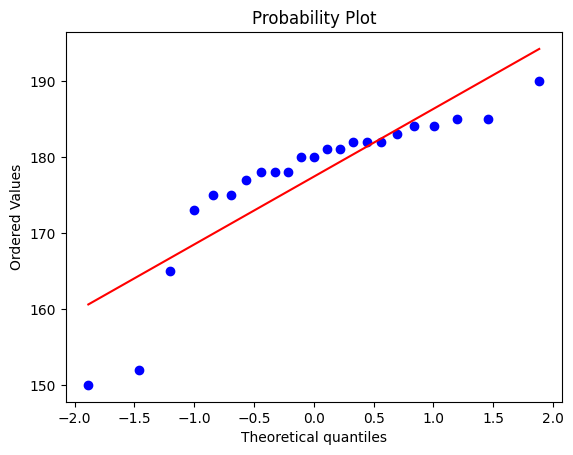

In [154]:
import matplotlib.pyplot as plt

scipy.stats.probplot(heights.height, dist="norm", plot=plt)
plt.show()

Um die Normalverteilung zu überprüfen, werden folgende Tests durchgeführt:
1. Shapiro-Wilk-Test
2. D’Agostino-Pearson-Test (normaltest)
3. Anderson-Darling-Test

In [155]:
from scipy.stats import anderson, normaltest, shapiro

stat, p = shapiro(heights["height"])
print(f'Statistik={stat:.4f}, p-Wert={p:.4f}')
if p > alpha:
    print('annähernd normalverteilt (p > 0.05)')
else:
    print('signifikant NICHT normalverteilt (p <= 0.05)')


Statistik=0.7777, p-Wert=0.0002
signifikant NICHT normalverteilt (p <= 0.05)


In [156]:
stat, p = normaltest(heights["height"])
print(f'Statistik={stat:.4f}, p-Wert={p:.4f}')
if p > alpha:
    print('wahrscheinlich normalverteilt (p > 0.05)')
else:
    print('wahrscheinlich NICHT normalverteilt (p <= 0.05)')

Statistik=17.3024, p-Wert=0.0002
wahrscheinlich NICHT normalverteilt (p <= 0.05)


In [157]:
result = anderson(heights["height"])
print(f'Statistik: {result.statistic:.4f}')
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f'Für {sl}% Signifikanzniveau: normalverteilt (Statistik < {cv})')
    else:
        print(f'Für {sl}% Signifikanzniveau: NICHT normalverteilt (Statistik >= {cv})')

Statistik: 1.9171
Für 15.0% Signifikanzniveau: NICHT normalverteilt (Statistik >= 0.511)
Für 10.0% Signifikanzniveau: NICHT normalverteilt (Statistik >= 0.582)
Für 5.0% Signifikanzniveau: NICHT normalverteilt (Statistik >= 0.699)
Für 2.5% Signifikanzniveau: NICHT normalverteilt (Statistik >= 0.815)
Für 1.0% Signifikanzniveau: NICHT normalverteilt (Statistik >= 0.969)


## Interpretation
Die Messungen sind nicht normalverteilt und die Stichprobe ist zu klein, um mit dem zentralen Grenzwertsatz zu argumentieren.
Daher ist weder der z-Test noch der t-Test anwendbar.


# Test für nicht normalverteilte Daten

## Schritt 1
Da für die Stichprobe weder z-Test noch t-Test anwendbar sind, wird ein geeigneter Test gesucht.
Wir wissen, dass die Daten nicht normalverteilt sind. Wir testen nun, ob die Stichprobe symmetrisch ist.

In [158]:
from scipy.stats import skew
s = skew(heights["height"])
print(f"Die Schiefe beträgt {s:.4f}")
if s > 0:
    print("Die Verteilung ist rechtsschief, bzw. stark rechtsschief, falls der Wert grösser als 1 ist.")
elif s < 0:
    print("Die Verteilung ist linksschief, bzw. stark linksschief, falls der Wert kleiner als -1 ist.")

Die Schiefe beträgt -1.7662
Die Verteilung ist linksschief, bzw. stark linksschief, falls der Wert kleiner als -1 ist.


Da die Stichprobe nicht symmetrisch ist, wird ein einfacher Vorzeichen-Test angewendet.
Voraussetzungen:
- keine Annahme über Symmetrie.
- keine Normalverteilung notwendig.
- Die Daten sind ordinal oder metrisch skaliert.

## Schritt 2
Für den Vorzeichen-Test wird der Median gegen den Referenzwert von 170cm getestet.

$\mu_0 = 170cm$

$H_0: \tilde x \leq \mu_0$

$H_A: \tilde x > \mu_0$

## Schritt 3
Für die Teststatistik wird der binomtest von scipy.stats verwendet.


In [159]:
from scipy.stats import binomtest

diffs = heights - mu0
n_pos = len(diffs[diffs > 0])
n_neg = len(diffs[diffs < 0])

result = binomtest(min(n_pos, n_neg), n=len(heights), p=0.5, alternative="greater")
result

BinomTestResult(k=23, n=23, alternative='greater', statistic=1.0, pvalue=1.1920928955078125e-07)

## Schritt 4
Der p-Wert ergab sich bereits.


In [160]:
p_wert = result.pvalue
p_wert

np.float64(1.1920928955078125e-07)

## Schritt 5
Da kein Signifikanzniveau angegeben ist, nehmen wir $\alpha = 0.05$.

## Schritt 6
Wird nicht benötigt.


## Schritt 7
Da $p$-Wert $< \alpha$ ist, wird die Nullhypothese $H_0$ verworfen.


In [161]:
if p_wert < alpha:
    print("Verwerfen von H0")
else:
    print("Nicht verwerfen von H0")

Verwerfen von H0
